In [10]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import torch
import sys

sys.path.append("../..")
from experiments.utils.models import create_vector_transform
from manifold_flow.flows import ManifoldFlow
from manifold_flow.transforms import SphericalCoordinates

## Look at OOD samples

In [2]:
x_ood = np.array(
    [np.load("../data/samples/spherical_gaussian/spherical_gaussian_2_3_0.001_x_ood.npy"),
    np.load("../data/samples/spherical_gaussian/spherical_gaussian_2_3_0.010_x_ood.npy"),
    np.load("../data/samples/spherical_gaussian/spherical_gaussian_2_3_0.100_x_ood.npy")]
)

In [24]:
def r(x):
    return np.sum(x**2, axis=-1)**0.5

In [25]:
r_ood = r(x_ood)

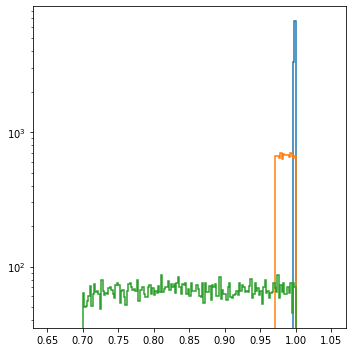

In [26]:
fig = plt.figure(figsize=(5,5))

for r_ in r_ood:
    plt.hist(r_, range=(0.65,1.05), bins=200, histtype="step", lw=1.5)
    
plt.yscale("log")
    
plt.tight_layout()
plt.show()

## Load a model

In [11]:
def make_model(filename):
    outer_transform = SphericalCoordinates(n=2, r0=1.0)
    inner_transform = create_vector_transform(
        2,
        5,
        linear_transform_type="permutation",
        base_transform_type="rq-coupling",
        context_features=None,
        dropout_probability=0.,
    )
    model = ManifoldFlow(
        data_dim=3,
        latent_dim=2,
        outer_transform=outer_transform,
        inner_transform=inner_transform,
        apply_context_to_outer=False,
        pie_epsilon=0.01,
    )
    model.load_state_dict(torch.load(filename, map_location=torch.device("cpu")))
    
    return model

In [12]:
model = make_model("../data/models/mf_specified_2_spherical_gaussian_2_3_0.010.pt")

In [21]:
x_reco, log_prob, _ = model(torch.from_numpy(x_ood[1]).to(torch.float))
x_reco = x_reco.detach().numpy()

In [29]:
delta_r = r(x_reco) - r(x_ood[1])
r_delta = r(x_reco - x_ood[1])

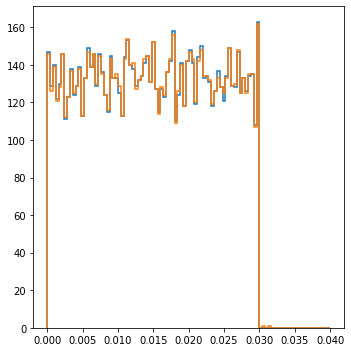

In [34]:
fig = plt.figure(figsize=(5,5))

plt.hist(delta_r, range=(0.0,0.04), bins=100, histtype="step", lw=1.5)
plt.hist(r_delta, range=(0.0,0.04), bins=100, histtype="step", lw=1.5)
    
#plt.yscale("log")
    
plt.tight_layout()
plt.show()